<a href="https://colab.research.google.com/github/FAYASISMAEL/AI-ML-Visualization-Files/blob/main/DecisionTree(05_01_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('/content/heart_v2.csv')
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [2]:
data.isna().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


In [3]:
data.dtypes

,0
age,int64
sex,int64
BP,int64
cholestrol,int64
heart disease,int64


In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
for col in data.columns:
  print(col, data[col].unique())

age [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
sex [1 0]
BP [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
cholestrol [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192]
heart disease [1 0]


In [6]:
import numpy as np

data.replace(['?', '#', ' ', 'NA'], np.nan, inplace = True)

In [7]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')


/tmp/ipython-input-4100580395.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


handle missing values

In [8]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [9]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [10]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
data = pd.get_dummies(data, drop_first=True)

In [12]:
X = data.drop('heart disease', axis=1)
y = data['heart disease']

In [13]:
X.columns

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

In [14]:
y.name

'heart disease'

In [15]:
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [17]:
X_train.shape

(189, 4)

In [18]:
X_test.shape

(81, 4)

In [19]:
y_train.shape

(189,)

In [20]:
y_test.shape

(81,)

In [31]:
X

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


Model Buiding

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
data_classifier = DecisionTreeClassifier(
    max_depth = 4, # Limited Tree depth
    min_samples_split = 10, # Minimum samples required to split a node
    min_samples_leaf = 5, # Minimum samples required at leaf node
    random_state = 100, # random field
    criterion = 'gini' # Use gini impurity for split criterion
    #criterion = 'entropy' # Use gini impurity for split criterion
    #criterion = 'log_loss' # Use gini impurity for split criterion
)

data_classifier.fit(X_train, y_train)

print('Decision Tree classifier trained successsfully')
print(f'Tree depth: {data_classifier.get_depth()}')
print(f'Number of leaves: {data_classifier.get_n_leaves()}')

Decision Tree classifier trained successsfully
Tree depth: 4
Number of leaves: 13


make predictions

In [23]:
y_train_pred = data_classifier.predict(X_train)
y_test_pred = data_classifier.predict(X_test)

# y_test_pred_proba = data_classifier.predict_proba(X_test)[:,1]

print('Prediction generated successfully!')
print(f'\nSample prediction (first 10): ')
print(y_test_pred[:10])

Prediction generated successfully!

Sample prediction (first 10): 
[0 0 1 1 1 1 1 1 1 0]


accuracy checking

In [24]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [25]:
train_accuracy

0.7513227513227513

In [26]:
test_accuracy

0.6049382716049383

Visualize Decision Tree

KeyError: np.int64(1)

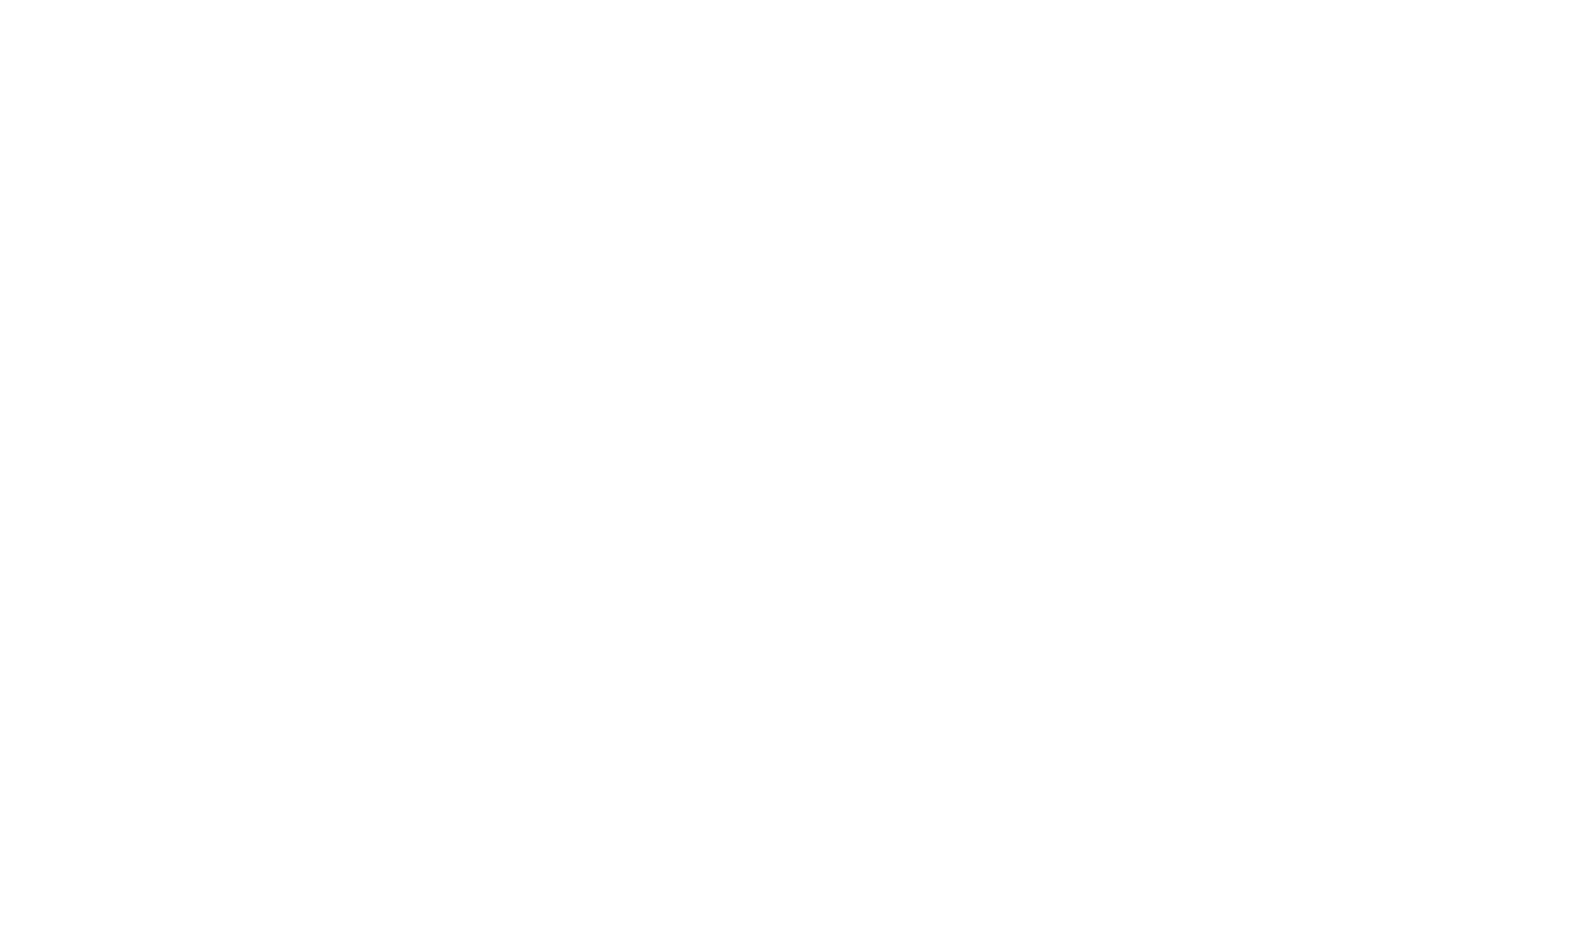

In [30]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(
    data_classifier,
    feature_names = X,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()